# 뉴스 그룹 분류 경진대회

In [1]:
import pandas as pd

train = pd.read_csv('./data/train.csv')

In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9233 entries, 0 to 9232
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      9233 non-null   int64 
 1   text    9233 non-null   object
 2   target  9233 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 216.5+ KB


In [3]:
train.isna().sum()

id        0
text      0
target    0
dtype: int64

In [4]:
train.shape

(9233, 3)

In [5]:
sorted(train['target'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [6]:
def check_missing_col(dataframe):
    missing_col = []
    for col in dataframe.columns:
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            print(f'결측치가 있는 컬럼은: {col} 입니다')
            print(f'해당 컬럼에 총 {missing_values} 개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if missing_col == []:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(train)

결측치가 존재하지 않습니다


In [7]:
import re 

def clean_text(texts): 
  corpus = [] 
  for i in range(0, len(texts)): 
    review = re.sub(r'\s+', ' ', texts[i]) #extra space 제거
    review = re.sub(r'\s+', ' ', review) #spaces 제거
    review = re.sub(r"^\s+", '', review) #space from start 제거
    review = re.sub(r'\s+$', '', review) #space from the end 제거
    review = re.sub(r'_', ' ', review) #space from the end 제거
    corpus.append(review) 
  
  return corpus

#     review = re.sub(r'[@%\\*=()/~#&\+á?\xc3\xa1\-\|\.\:\;\!\-\,\_\~\$\'\"\n\]\[\>]', '',texts[i]) #@%*=()/+ 와 같은 문장부호 제거
#     review = re.sub(r'\d+','', review)#숫자 제거
#     review = review.lower() #소문자 변환
#     review = re.sub(r'<[^>]+>','',review) #Html tags 제거

In [8]:
temp = clean_text(train['text']) #메소드 적용
train['text'] = temp
train.head()

,id,text,target
0,0,"They were, and even if Washington might consid...",10
1,1,"We run ""SpaceNews & Views"" on our STAREACH BBS...",14
2,2,Not to worry. The Masons have been demonized a...,19
3,3,"Only Brendan McKay, or maybe ARF, would come t...",17
4,4,Help: I am running some sample problems from O...,5


# EDA

### 뉴스 그룹 비율 확인

#### 스무개의 뉴스 그룹 각각의 개수 확인

In [9]:
val_count = train['target'].value_counts() # 유니크값의 개수를 확인합니다.

for i in range(0,20):
  print(f'라벨 {i}인 리뷰 개수:', val_count[i])

라벨 0인 리뷰 개수: 386
라벨 1인 리뷰 개수: 480
라벨 2인 리뷰 개수: 458
라벨 3인 리뷰 개수: 467
라벨 4인 리뷰 개수: 490
라벨 5인 리뷰 개수: 496
라벨 6인 리뷰 개수: 494
라벨 7인 리뷰 개수: 493
라벨 8인 리뷰 개수: 475
라벨 9인 리뷰 개수: 490
라벨 10인 리뷰 개수: 482
라벨 11인 리뷰 개수: 488
라벨 12인 리뷰 개수: 483
라벨 13인 리뷰 개수: 490
라벨 14인 리뷰 개수: 467
라벨 15인 리뷰 개수: 515
라벨 16인 리뷰 개수: 428
라벨 17인 리뷰 개수: 455
라벨 18인 리뷰 개수: 387
라벨 19인 리뷰 개수: 309


#### plot 함수를 이용해 label 개수를 그래프로 그려 시각적으로 비교

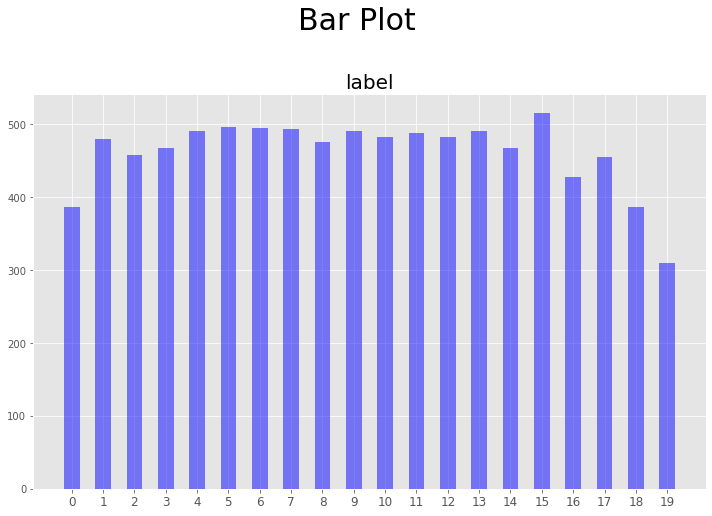

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

%matplotlib inline
plt.style.use("ggplot")

# 히스토그램 을 사용해서 데이터의 분포를 살펴봅니다.
feature = train['target']

plt.figure(figsize=(10,7.5)) # 그래프 이미지 크기 설정
plt.suptitle("Bar Plot", fontsize=30) # 부제목과 폰트 크기 설정

plt.title('label', fontsize=20) # 제목과 폰트 크기 설정
temp = feature.value_counts() # feature 변수의 변수별 개수 계산
plt.bar(temp.keys(), temp.values, width=0.5, color='b', alpha=0.5) # 막대그래프 생성
plt.xticks(temp.keys(), fontsize=12) # x축 값, 폰트 크기 설정
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # 레이아웃 설정
plt.show() # 그래프 나타내기

총 9233개의 데이터에서 20가지 라벨이 모두 300개가 넘고,

그중 19번 마지막 라벨이 가장 수가 적은 것을 확인.

# 뉴스 text 길이 확인

In [11]:
str_len_mean = np.mean(train['text'].str.len()) # 리뷰 길이의 평균값 계산
print('뉴스의 평균 길이 :',round(str_len_mean,0))

뉴스의 평균 길이 : 1163.0


In [12]:
# 데이터 필터링을 위한 마스크 설정
for i in range(0, 20):
  globals()['mask_{}'.format(i)] = (train.target == i)

# 전체 및 그룹 집합을 설정합니다.
df_train = train.text.copy() # 전체 train 데이터

for i in range(0, 20):
  globals()['df_{}'.format(i)] = train.loc[globals()['mask_{}'.format(i)],:].text # 20가지 라벨 각각에 해당하는 데이터를 df0~19로 할당

# 스무가지로 나뉜 집합을 리스트로 묶어줍니다.
compare = [df_0, df_1, df_2, df_3, df_4, df_5, 
           df_6, df_7, df_8, df_9, df_10, df_11,
           df_12, df_13, df_14, df_15, df_16, df_17,
           df_18, df_19]

#### Word Cloud & 시각화

In [13]:
# !pip install wordcloud-1.8.1-cp39-cp39-win_amd64.whl

In [14]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import nltk
import pickle
from nltk.corpus import stopwords
from os import path

In [15]:
# 하나의 문자열
def df2str(df):
    
    s = [s for s in df]
    document = ""
    for i in range(len(s)):
        document += s[i]
    return document

워드클라우드를 만들기 위하여 텍스트를 토큰화 하겠습니다. nltk의 word_tokenize 메소드를 이용하여 토큰화

In [16]:
word_tokens = nltk.word_tokenize(df2str(df_14))

### 품사 분리 POS tagging
데이터 분석에 가장 큰 의미를 갖는 형태소인 명사만을 추출하기 위하여
토큰화된 단어의 품사를 분리해보도록 하겠습니다.
nltk의 pos_tag 메소드를 이용하여 품사분리를 진행합니다.

In [17]:
# pos_tag()의 입력값으로는 단어의 리스트가 들어가야 한다.
tokens_pos = nltk.pos_tag(word_tokens)

### 명사만 추출하기
명사는 NN을 포함하고 있으므로 NN이 들어있는 단어만을 추출해보도록 하겠습니다.

In [18]:
# 명사는 NN을 포함하고 있음을 알 수 있음
NN_words = []
for word, pos in tokens_pos:
    if 'NN' in pos:
        NN_words.append(word)

## 품사 원형 찾기

워드클라우드 단어의 빈도수를 정확히 축정하기 위하여 단어의 원형형태로 통일해보도록 하겠습니다.

nltk에서 제공하는 WordNetLemmatizer() 메소드를 이용해 보겠습니다.

In [19]:
# 명사의 경우 보통 복수 -> 단수 형태로 변형
wlem = nltk.WordNetLemmatizer()
lemmatized_words = []
for word in NN_words:
    new_word = wlem.lemmatize(word)
    lemmatized_words.append(new_word)

## 불용어 처리

nltk에서 제공하는 불용어 기본 사전 이용하여 워드클라우드에 사용하지 않을 단어를 제거해 봅시다. 

In [20]:
stopwords_list = stopwords.words('english') #nltk에서 제공하는 불용어사전 이용
#print('stopwords: ', stopwords_list)
unique_NN_words = set(lemmatized_words)
final_NN_words = lemmatized_words

# 불용어 제거
for word in unique_NN_words:
    if word in stopwords_list:
        while word in final_NN_words: final_NN_words.remove(word)

## 빈도분석

In [21]:
from collections import Counter
c = Counter(final_NN_words)
k = 10

In [22]:
c.most_common(k) # 빈도수 기준 상위 k개 단어 출력

[('space', 217),
 ('mission', 146),
 ('year', 145),
 ('*', 144),
 ('Space', 140),
 ('time', 135),
 ('orbit', 125),
 ('NASA', 123),
 ('probe', 122),
 ('Earth', 115)]

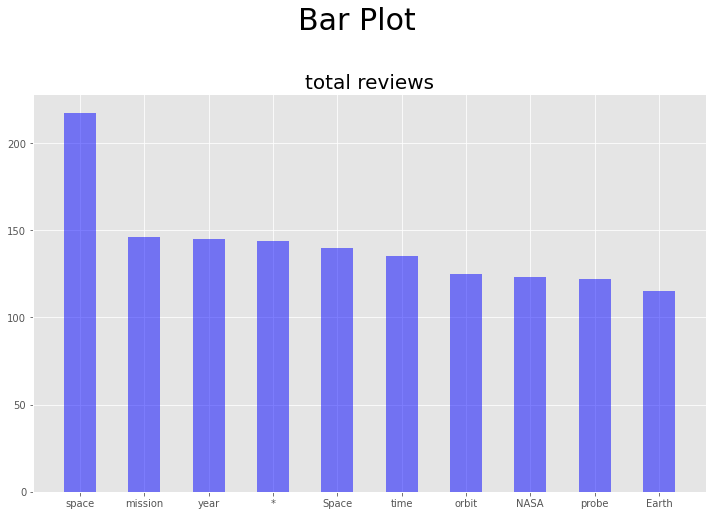

In [23]:
top_10 = c.most_common(k) # 추출한 명사 중 상위 10개
keys = [top_10[i][0] for i in range(len(top_10))]
values = [top_10[i][1] for i in range(len(top_10))]

plt.figure(figsize=(10,7.5))
plt.suptitle("Bar Plot", fontsize=30)
plt.title('total reviews', fontsize=20)
plt.bar(keys, values, width=0.5, color='b', alpha=0.5)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## 워드클라우드

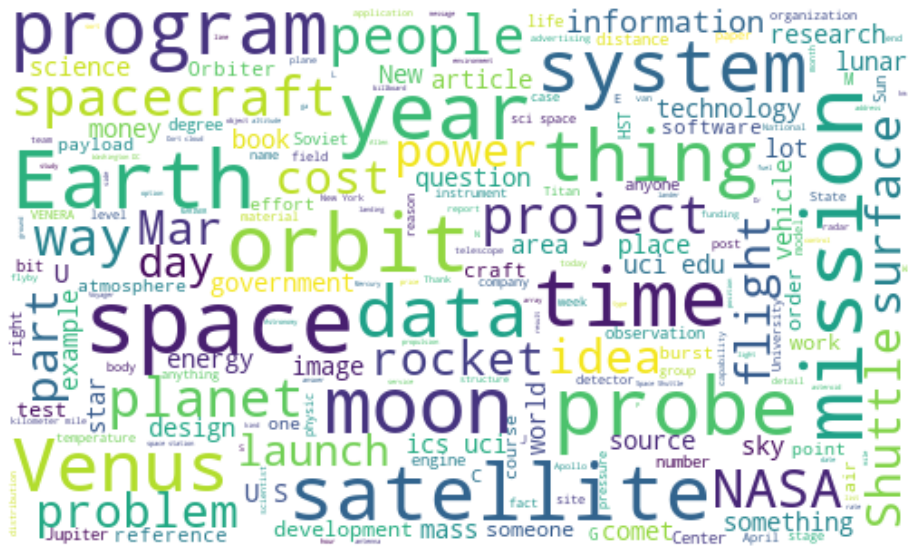

In [24]:
noun_text = ''
for word in final_NN_words:
    noun_text = noun_text +' '+word

wordcloud = WordCloud(max_font_size=50, #가장 큰 폰트 크기 제한
                      width=500, #너비
                      height=300, #높이
                      background_color='white', #배경 색상
                      relative_scaling=.2 #상대적인 크기
                      ).generate(noun_text)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# 분류 학습 및 예측

In [25]:
X = train['text'].values
y = train['target'].values

In [26]:
stopwords = [
    "a", "about", "above", "across", "after", "afterwards", "again", "against",
    "all", "almost", "alone", "along", "already", "also", "although", "always",
    "am", "among", "amongst", "amoungst", "amount", "an", "and", "another",
    "any", "anyhow", "anyone", "anything", "anyway", "anywhere", "are",
    "around", "as", "at", "back", "be", "became", "because", "become",
    "becomes", "becoming", "been", "before", "beforehand", "behind", "being",
    "below", "beside", "besides", "between", "beyond", "bill", "both",
    "bottom", "but", "by", "call", "can", "cannot", "cant", "co", "con",
    "could", "couldnt", "cry", "de", "describe", "detail", "do", "done",
    "down", "due", "during", "each", "eg", "eight", "either", "eleven", "else",
    "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone",
    "everything", "everywhere", "except", "few", "fifteen", "fifty", "fill",
    "find", "fire", "first", "five", "for", "former", "formerly", "forty",
    "found", "four", "from", "front", "full", "further", "get", "give", "go",
    "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter",
    "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his",
    "how", "however", "hundred", "i", "ie", "if", "in", "inc", "indeed",
    "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter",
    "latterly", "least", "less", "ltd", "made", "many", "may", "me",
    "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly",
    "move", "much", "must", "my", "myself", "name", "namely", "neither",
    "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone",
    "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on",
    "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our",
    "ours", "ourselves", "out", "over", "own", "part", "per", "perhaps",
    "please", "put", "rather", "re", "same", "see", "seem", "seemed",
    "seeming", "seems", "serious", "several", "she", "should", "show", "side",
    "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone",
    "something", "sometime", "sometimes", "somewhere", "still", "such",
    "system", "take", "ten", "than", "that", "the", "their", "them",
    "themselves", "then", "thence", "there", "thereafter", "thereby",
    "therefore", "therein", "thereupon", "these", "they", "thick", "thin",
    "third", "this", "those", "though", "three", "through", "throughout",
    "thru", "thus", "to", "together", "too", "top", "toward", "towards",
    "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us",
    "very", "via", "was", "we", "well", "were", "what", "whatever", "when",
    "whence", "whenever", "where", "whereafter", "whereas", "whereby",
    "wherein", "whereupon", "wherever", "whether", "which", "while", "whither",
    "who", "whoever", "whole", "whom", "whose", "why", "will", "with",
    "within", "without", "would", "yet", "you", "your", "yours", "yourself",
    "yourselves"]


In [27]:
def preprocessor(text):
    text = re.sub('<[^>]*>', '', text) # Effectively removes HTML markup tags
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = re.sub('[\W]+', ' ', text.lower()) + ' '.join(emoticons).replace('-', '')
    return text

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words=stopwords, ngram_range=(1,2), min_df=2)
# min_df=2, preprocessor=preprocessor,
vectorizer.fit(X) 
X = vectorizer.transform(X) 

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, stratify=y)

In [30]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(max_iter=500)

In [31]:
model.fit(X_train, Y_train)

MLPClassifier(max_iter=500)

In [32]:
from sklearn.metrics import accuracy_score

model.score(X_train, Y_train), model.score(X_test, Y_test)
# min_df를 1로 하면 test 데이터의 정확도가 올라가지만 시간이 많이 걸림.

(0.9891686975358787, 0.7731456415809421)

# -------------------------------------------------------------------------------------

## X_train을 학습한 모델이 아닌 X 데이터 전체를 학습시킴. ( 과적합의 우려보다 데이터의 양이  

## 많지가 않아서 오히려 점수가 올라감 )

In [33]:
# from sklearn.neural_network import MLPClassifier
# model = MLPClassifier(max_iter=500)
# model.fit(X, y)

In [34]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X[0])
print('예측 라벨 : ', y_pred)
print('실제 라벨 : ', train.target[0])

예측 라벨 :  [10]
실제 라벨 :  10


In [35]:
test = pd.read_csv("data/test.csv") #파일 읽기
test.head() #파일 확인


,id,text
0,0,\nThe VL-IDE Adapter can be much faster then t...
1,1,\n\nYeah. In a fire that reportedly burned ho...
2,2,":Judge: ""I grant you immunity from whatever ma..."
3,3,"I, too, put a corbin seat on my Hawk. I got t..."
4,4,\n\nDo I ever!!!!!! After 2 years of having h...


In [36]:
temp = clean_text(test['text']) #메소드 적용
test['text'] = temp
test.head()

,id,text
0,0,The VL-IDE Adapter can be much faster then the...
1,1,Yeah. In a fire that reportedly burned hotter ...
2,2,":Judge: ""I grant you immunity from whatever ma..."
3,3,"I, too, put a corbin seat on my Hawk. I got th..."
4,4,Do I ever!!!!!! After 2 years of having health...


In [37]:
test_X = test.text #문서 데이터 생성

test_X_vect = vectorizer.transform(test_X) #문서 데이터 transform 
#test 데이터를 대상으로 fit_transform 메소드를 실행하는 것은 test 데이터를 활용해 vectorizer 를 학습 시키는 것으롤 data leakage 에 해당합니다.

pred = model.predict(test_X_vect) #test 데이터 예측
print(pred)

[ 3 16 18 ...  4  1 14]


In [38]:
submission = pd.read_csv("./data/sample_submission.csv") # 제출용 파일 불러오기
submission.head() 

,id,target
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [39]:
submission["target"] = pred # 예측 값 넣어주기
submission.head()

,id,target
0,0,3
1,1,16
2,2,18
3,3,8
4,4,4
